In [234]:
import numpy as np
from numpy import array, eye, sin, cos, exp, pi, kron, tensordot, conj, trace, sqrt, real, reshape
from numpy.linalg import norm, eigvals, svd
from scipy.linalg import sqrtm, expm, logm, qr
import matplotlib.pyplot as plt
from numba import jit
rng = np.random.default_rng()

In [228]:
sigma = [si, sx, sy, sz] = array([
    [[1, 0], [0, 1]],
    [[0, 1], [1, 0]],
    [[0, -1j], [1j, 0]],
    [[1, 0], [0, -1]]
])



def randomCMat(n): return rng.standard_normal((n,n)) + 1j* rng.standard_normal((n,n))
def randomUnitary(n):
    q, r = qr(randomComplexMat(n))
    return q

def randomHermitian(n=2,*, traceless=False):
    a = randomCMat(n)
    if traceless:
        return a.conj().T + a - 2*real(trace(a))*eye(n)/n
    else:
        return a.conj().T + a

def randomOmega(a, b, n=2):
    B0 = randomHermitian(n, traceless=True)
    B1, B2, B3 = (randomHermitian(n),)*3
    W = kron(sx, B1) + kron(sy, B2) + kron(sz, B3)
    return a/norm(B0,2) * kron(si,B0) + b/norm(W,2) * W

def randomUnitVec():
    phi, z = rng.uniform(0, 2*pi), rng.uniform(-1,1)
    return array([sqrt(1-z**2)*cos(phi), sqrt(1-z**2)*sin(phi), z])


def randomUniRot(theta):
    phi, z = rng.uniform(0, 2*pi), rng.uniform(-1,1)
    x, y = sqrt(1-z**2)*cos(phi), sqrt(1-z**2)*sin(phi)
    c, s = cos(theta), sin(theta)
    return array([[ c - 1j*z*s, (-1j*x-y)*s ], [ (-1j*x+y)*s, c + 1j*z*s] ])
    

In [247]:
def trace_s(a): nb=len(a)//2; return trace(reshape(a,(2,nb,2,nb)),axis1=0,axis2=2)
def trace_b(a): nb=len(a)//2; return trace(reshape(a,(2,nb,2,nb)),axis1=1,axis2=3)
def proj0(W): return kron(si,trace_s(W))/2

def bathph(W): return norm(trace_s(W)/2,2)
def errph(W): return norm(W- proj0(W),2)
def tcpnorm(W): return bathph(W), errph(W)

In [254]:
def PDD(U): 
    Ib = np.eye( len(U)//2, dtype=complex)
    return -kron(sz,Ib)@U@kron(sx,Ib)@U@kron(sz,Ib)@U@kron(sx,Ib)@U

In [255]:
%timeit errph(logm(PDD(expm(-1j*randomOmega(0.1,0.1)))))

3.83 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [257]:
res = 100
amax, bmax = 0.25,0.75
da, db = amax/res, bmax/res
a = np.linspace(0., amax, res, endpoint=False)
b = np.linspace(da, bmax, res)
bDD = np.empty((res,res))

In [258]:
%%time
for i in range(100):
    for j in range(100):
        W = randomOmega(a[i],b[j])
        b2 = errph(logm(PDD(expm(-1j*W))))
        bDD[i,j] = b2/b[j]

CPU times: user 2min 37s, sys: 3.92 s, total: 2min 41s
Wall time: 45.2 s


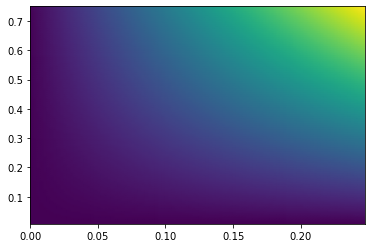

In [115]:
plt.pcolormesh(a,b,bDD,shading='gouraud');

In [91]:
for i in range(100):
    for j in range(100):
        bDD[i,j] = sin(a[i]*b[j])

In [94]:
A = [[0,1],[1,2]]

In [105]:
x = np.meshgrid([0,1],[0,1])
y = np.meshgrid([0,1],[0,1])

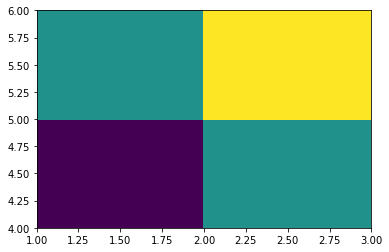

In [112]:
plt.pcolormesh([1,2,3],[4,5,6],A,shading='flat')

In [114]:
a.ndim

1